In [1]:
import hickle as hkl
import numpy as np
import os

In [2]:
def process_file(file):
    data = hkl.load(file)
    return data

In [3]:
all_data = {}
for file in os.listdir('.'):
    if "hkl" in file:
        data = process_file(file)
        print(data['task_training'], '\n\n') # there will be 0: [of len epochs #] task 0s epoch accuracy
        all_data[file] = data
print([(key,all_data[key]['f1_micro'],all_data[key]['f1_macro']) for key in all_data.keys()])


{0: [tensor(89.1830), tensor(89.5461), tensor(89.8481), tensor(89.8243), tensor(90.0524), tensor(89.9746), tensor(90.0359), tensor(90.1625), tensor(90.1353), tensor(90.0908), tensor(90.1237), tensor(90.2216), tensor(90.2067), tensor(90.1418), tensor(90.2891), tensor(90.3427), tensor(90.2332), tensor(90.2071), tensor(90.1966), tensor(90.2808), tensor(90.2972), tensor(90.3457), tensor(90.2592), tensor(90.3070), tensor(90.2559)], 1: [tensor(0.0107), tensor(0.0214), tensor(0.0299), tensor(0.0278), tensor(0.0534), tensor(0.0217)], 2: [tensor(0.2915), tensor(0.3571), tensor(0.4071), tensor(0.4701), tensor(0.4416), tensor(0.1832), tensor(0.2414), tensor(0.2309), tensor(0.2691), tensor(0.2396), tensor(0.0752), tensor(0.0953), tensor(0.1049), tensor(0.1337), tensor(0.1442), tensor(0.0449), tensor(0.0563), tensor(0.0528), tensor(0.0686)], 3: [tensor(0.2264), tensor(0.2222), tensor(0.2327), tensor(0.2313), tensor(0.2370), tensor(0.0275), tensor(0.0310), tensor(0.0261), tensor(0.0345), tensor(0.03

In [4]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

In [5]:

def print_confusion(data_mapping):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Create a 1x2 subplot layout for each run
    for i, run in enumerate(data_mapping.keys()):
        print(run, 'running')
        cm = data_mapping[run]['confusion']  # Get the confusion matrix for the specific run
        cm_np = cm.cpu().numpy() if isinstance(cm, torch.Tensor) else np.array(cm)

        

        # Plot the confusion matrix for each subplot
        
        display = ConfusionMatrixDisplay(cm_np)  # Use the numpy array of the confusion matrix
        display.plot(include_values=True, cmap='viridis', ax=axs[i], xticks_rotation='vertical')  # Include values and use the 'viridis' colormap
        axs[i].set_title(f'Confusion Matrix for {run}')  # Set title for each subplot
            # axs[i].set_xticklabels(display.display_labels, rotation=45)  # Rotate x-axis labels for better visibility
            # axs[i].set_yticklabels(display.display_labels)  # Set y-axis labels

            # Annotate each cell with the numerical value
            # f

        
    plt.tight_layout()
    plt.show()


dict_keys(['multi_modal_clustering_features_SHL.hkl'])
multi_modal_clustering_features_SHL.hkl running


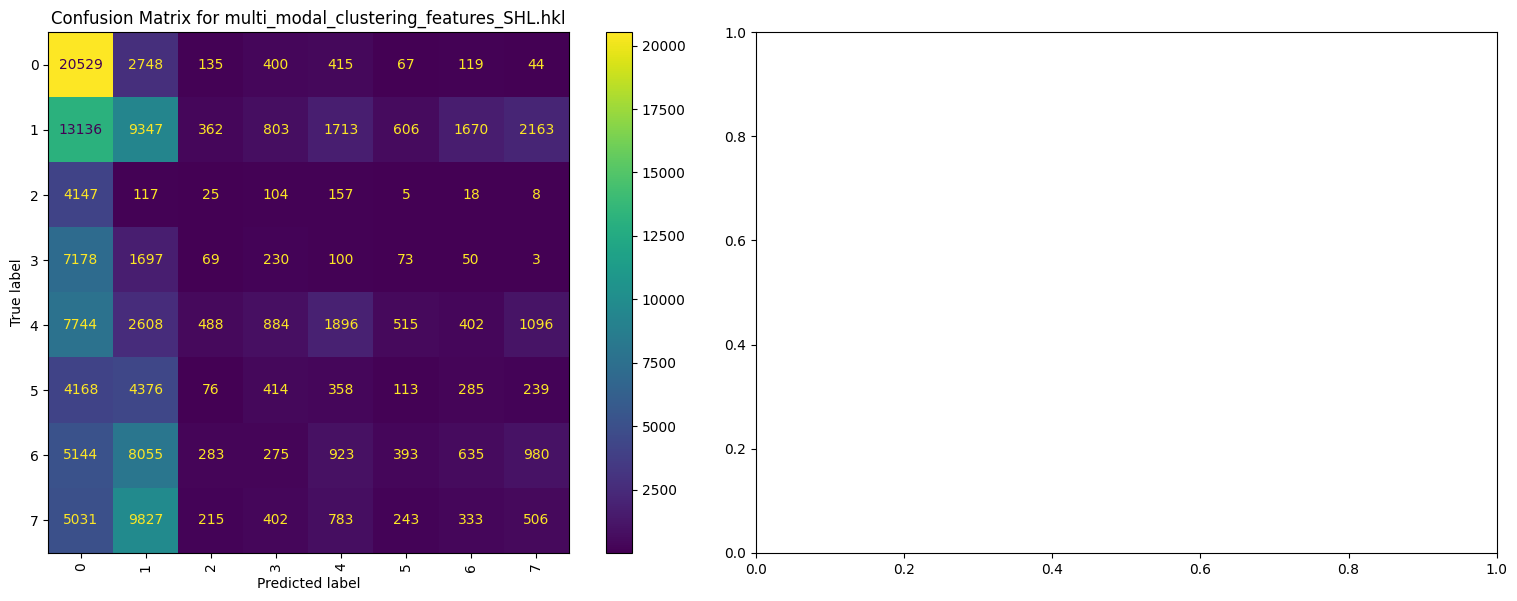

In [6]:
# to run the confusion matrix viewing
print(all_data.keys())
print_confusion(all_data)